In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)


In [2]:
df=pd.read_excel(r"amazon.xlsx")
df_bk=df.copy()

In [3]:
df

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...
...,...,...,...,...,...,...,...,...,...
20995,20996,__label2__,4,Y,Shoes,B00BXYM8T8,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ..."
20996,20997,__label2__,4,Y,Shoes,B0014C2ORK,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...
20997,20998,__label2__,5,Y,Shoes,B000EX8CCQ,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...
20998,20999,__label2__,5,Y,Shoes,B00748YHVE,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DOC_ID             21000 non-null  int64 
 1   LABEL              21000 non-null  object
 2   RATING             21000 non-null  int64 
 3   VERIFIED_PURCHASE  21000 non-null  object
 4   PRODUCT_CATEGORY   21000 non-null  object
 5   PRODUCT_ID         21000 non-null  object
 6   PRODUCT_TITLE      21000 non-null  object
 7   REVIEW_TITLE       21000 non-null  object
 8   REVIEW_TEXT        21000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [6]:
dup=df[df.duplicated()]
dup

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT


Mapping categorical variables

In [7]:
df['LABEL'] = df['LABEL'].map({'__label1__': 1, '__label2__': 0})
df['VERIFIED_PURCHASE'] = df['VERIFIED_PURCHASE'].map({'Y': 1, 'N': 0})

In [8]:
df['PRODUCT_CATEGORY'].value_counts()

PC                        700
Wireless                  700
Watches                   700
Musical Instruments       700
Home Entertainment        700
Pet Products              700
Lawn and Garden           700
Apparel                   700
Video Games               700
Luggage                   700
Outdoors                  700
Shoes                     700
Home Improvement          700
Tools                     700
Video DVD                 700
Grocery                   700
Books                     700
Jewelry                   700
Home                      700
Sports                    700
Camera                    700
Electronics               700
Furniture                 700
Kitchen                   700
Toys                      700
Health & Personal Care    700
Beauty                    700
Office Products           700
Baby                      700
Automotive                700
Name: PRODUCT_CATEGORY, dtype: int64

EDA

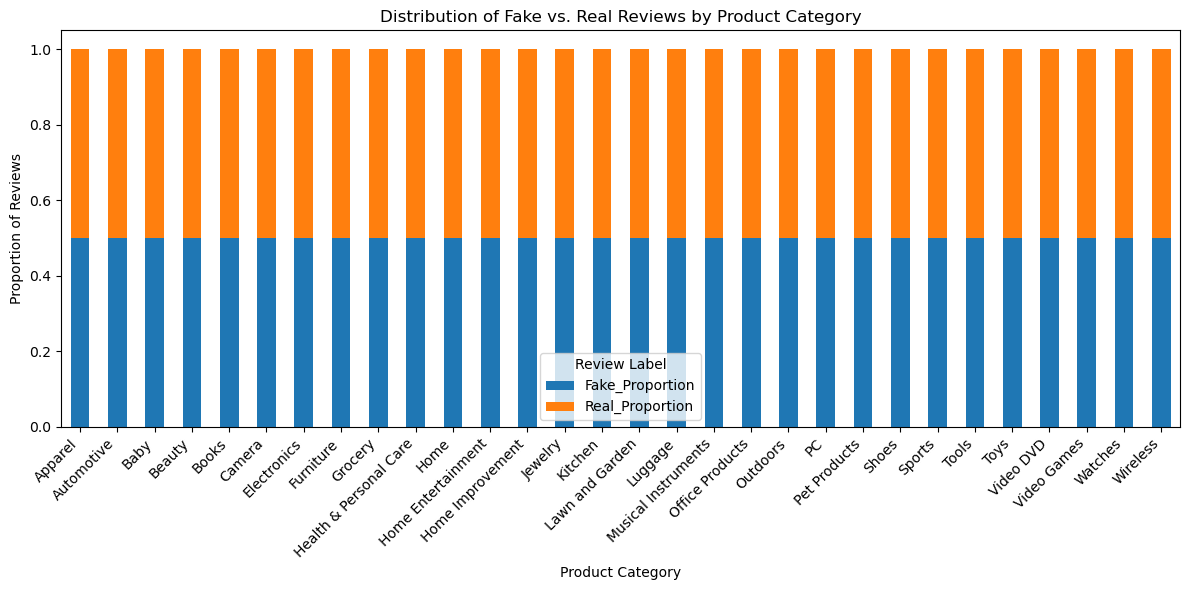

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
category_distribution = df.groupby(['PRODUCT_CATEGORY', 'LABEL']).size().unstack(fill_value=0)
category_distribution['Total'] = category_distribution.sum(axis=1)
category_distribution['Fake_Proportion'] = category_distribution[0] / category_distribution['Total']
category_distribution['Real_Proportion'] = category_distribution[1] / category_distribution['Total']
category_distribution[['Fake_Proportion', 'Real_Proportion']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Fake vs. Real Reviews by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Proportion of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Review Label')
plt.tight_layout()
plt.show()


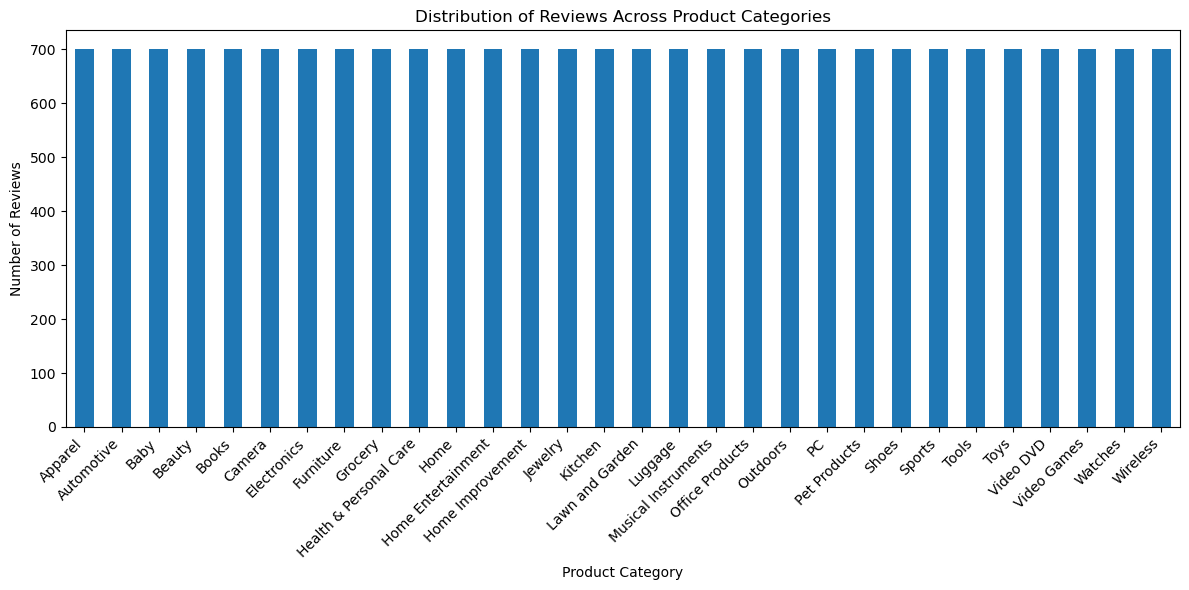

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
category_distribution = df.groupby('PRODUCT_CATEGORY').size()
category_distribution.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Reviews Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
unique=df['DOC_ID']

In [12]:
df.drop(['DOC_ID','PRODUCT_ID'],axis=1,inplace=True)

In [13]:
label_0 = df[df['LABEL'] == 0].iloc[1]['REVIEW_TEXT']
print(label_0)

This is probably one of the most exciting gifts you can give to a young child. Most kids are fascinated with the concept of driving. So having a little vehicle they can safely maneuver is awesome. We purchased this type of vehicle for all 3 of my kids. Everyone of them was thrilled. In fact, we parked them inside the garage facing forward as though they were &#34;parked&#34;.<br />This one sits a little high, so the child has to climb up to get on it. But they won't mind.<br />I would highly recommend elbow pads and a helmet. Though we've not seen our 4 wheeler turn over on us yet, but there were a couple of times going over some big bumps on the hilly areas that it looked as though it might tip. So steer your kids away from really bumpy areas and stay on mostly level ground. This is not a TRUE 4 wheeler. It is not designed for rough terrain. It is a TOY.<br />When it first arrives at your house, it might be best not to let the little ones know it's there. It has to be partly assembled

In [14]:
label_1 = df[df['LABEL'] == 1].iloc[1]['REVIEW_TEXT']
print(label_1)

Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.<br />There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked.


In [15]:
df['REVIEW_LENGTH'] = df['REVIEW_TEXT'].apply(len)

<IPython.core.display.Javascript object>

[Text(0.5, 1.0, 'Distribution of length of review ')]

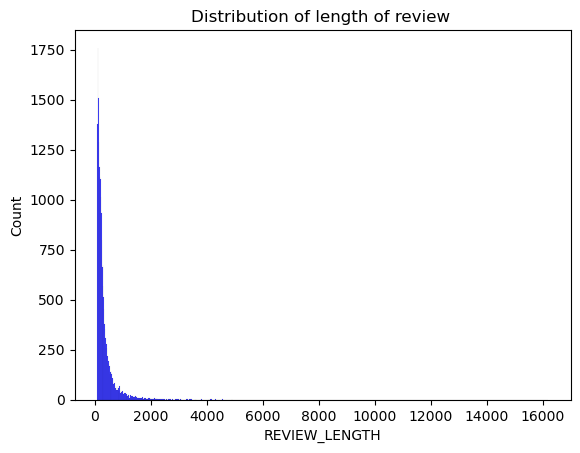

In [16]:
sns.histplot(df['REVIEW_LENGTH'],color='blue').set(title='Distribution of length of review ')


<IPython.core.display.Javascript object>

[Text(0.5, 1.0, 'Distribution of length of review if label = 0')]

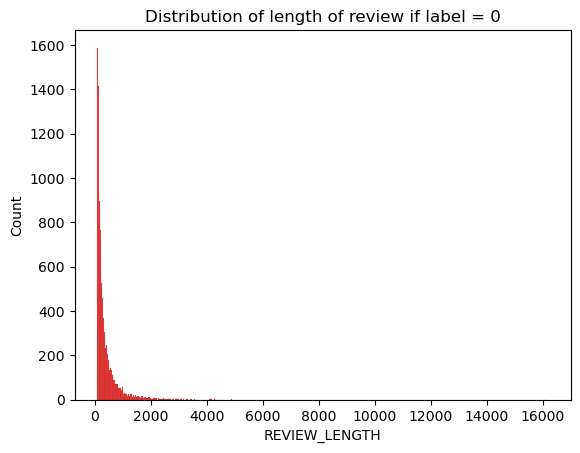

In [17]:
#real reviews have high length of the review
sns.histplot(df[df['LABEL']==0]['REVIEW_LENGTH'],color='red').set(title='Distribution of length of review if label = 0')

<IPython.core.display.Javascript object>

[Text(0.5, 1.0, 'Distribution of length of review if label = 1')]

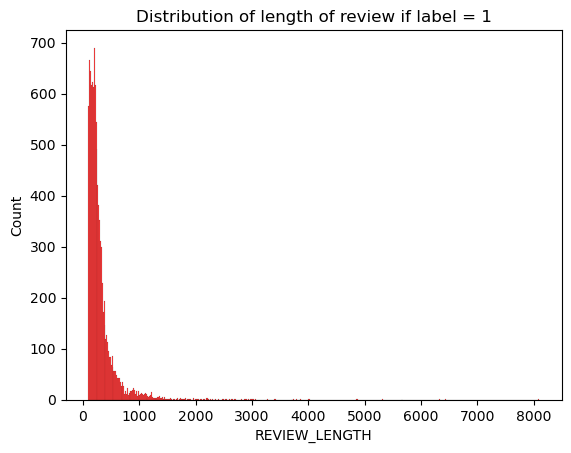

In [18]:
#fake reviews have low length of the review
sns.histplot(df[df['LABEL']==1]['REVIEW_LENGTH'],color='red').set(title='Distribution of length of review if label = 1')

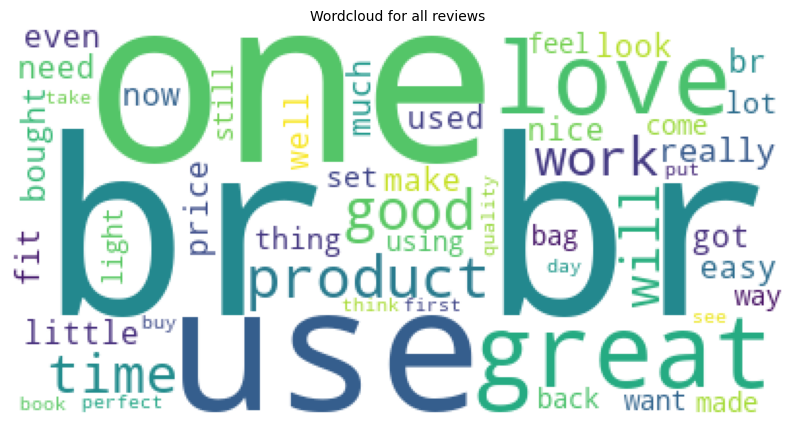

In [19]:
from wordcloud import WordCloud
reviews = " ".join([review for review in df['REVIEW_TEXT']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

Preprocessing

In [20]:
import string
punctuation_symbols = set(string.punctuation)
punctuation_symbols

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [21]:
df['NUM_PUNCTUATIONS'] = df['REVIEW_TEXT'].apply(lambda text: sum(1 for char in text if char in punctuation_symbols))

In [22]:
def count_capital_letters(tokens):
    count = 0
    for token in tokens:
        for char in token:
            if char.isupper():
                count += 1
    return count

In [23]:
df['CAPS_COUNT']=df['REVIEW_TEXT'].apply(count_capital_letters)

In [24]:
import re
import string
match_list = []

def checkName(title,text):
    matches = []
    for word in title.split():
        word = "".join((char for char in word if char not in string.punctuation))
        myreg = r'\b'+word+r'\b'
        r = re.compile(myreg, flags=re.I | re.X)
        matches.append(r.findall(text))
    return len(matches)

for a,b in zip(df.PRODUCT_TITLE, df.REVIEW_TEXT):
    number_of_matches = checkName(a,b)
    match_list.append(number_of_matches)
    
df["matchesPTITLE"] = match_list

In [25]:
df

,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,REVIEW_LENGTH,NUM_PUNCTUATIONS,CAPS_COUNT,matchesPTITLE
0,1,4,0,PC,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,2,7
1,1,4,1,Wireless,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,7,4,24
2,1,3,0,Baby,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,8,6,5
3,1,4,0,Office Products,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,4,6,6
4,1,4,0,Beauty,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,6,4,11
...,...,...,...,...,...,...,...,...,...,...,...
20995,0,4,1,Shoes,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ...",100,4,4,8
20996,0,4,1,Shoes,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...,115,2,3,10
20997,0,5,1,Shoes,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...,297,9,9,9
20998,0,5,1,Shoes,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...,287,5,7,8


In [26]:
import nltk
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def count_stopwords(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum

def count_characters(text):
    return sum(1 for char in text if char.isalpha())

df["stopwords_count"] = df["REVIEW_TEXT"].apply(count_stopwords)
df["characters_count"] = df["REVIEW_TEXT"].apply(count_characters)

In [27]:
df

,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,REVIEW_LENGTH,NUM_PUNCTUATIONS,CAPS_COUNT,matchesPTITLE,stopwords_count,characters_count
0,1,4,0,PC,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,2,7,10,91
1,1,4,1,Wireless,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,7,4,24,28,329
2,1,3,0,Baby,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,8,6,5,25,188
3,1,4,0,Office Products,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,4,6,6,18,165
4,1,4,0,Beauty,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,6,4,11,34,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0,4,1,Shoes,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ...",100,4,4,8,8,74
20996,0,4,1,Shoes,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...,115,2,3,10,11,89
20997,0,5,1,Shoes,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...,297,9,9,9,19,231
20998,0,5,1,Shoes,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...,287,5,7,8,23,223


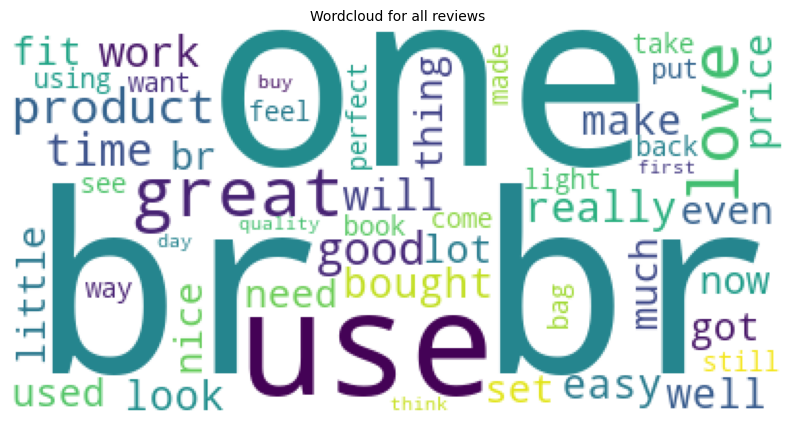

Top 10 most frequent words:
the: 58537
and: 41964
I: 41869
to: 36004
a: 35745
it: 25016
is: 24981
of: 20991
for: 19219
this: 17259


In [28]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = " ".join(df['REVIEW_TEXT'])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()
word_counts = Counter(reviews.split())
top_10_words = word_counts.most_common(10)
print("Top 10 most frequent words:")
for word, count in top_10_words:
    print(f"{word}: {count}")


In [29]:
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [30]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 


In [31]:
from nltk.corpus import stopwords
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
additional_stopwords = ['br', 'one', 'product', 'would', 'use']
stop_words.update(additional_stopwords)


def clean_text(text):
    text = re.sub('[^a-zA-z]', ' ', text).lower()
    tokens = nltk.word_tokenize(text)
    pos_tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tagged_tokens if token not in stop_words]
    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
df['CLEANED_TEXT'] = df['REVIEW_TEXT'].apply(clean_text)

In [33]:
df['CLEANED_TITLE'] = df['REVIEW_TITLE'].apply(clean_text)

In [34]:
df['CLEANED_PRODUCT_TITLE'] = df['PRODUCT_TITLE'].apply(clean_text)

In [35]:
df

,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,REVIEW_LENGTH,NUM_PUNCTUATIONS,CAPS_COUNT,matchesPTITLE,stopwords_count,characters_count,CLEANED_TEXT,CLEANED_TITLE,CLEANED_PRODUCT_TITLE
0,1,4,0,PC,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,2,7,10,91,least think save day keep around case need som...,useful,targus pauk u ultra mini usb keypad black
1,1,4,1,Wireless,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,7,4,24,28,329,lithium battery something new introduce market...,new era battery,note battery stalion strength replacement mah ...
2,1,3,0,Baby,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,8,6,5,25,188,purchase swing baby month pretty much grown lo...,swing well,fisher price papasan cradle swing starlight
3,1,4,0,Office Products,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,4,6,6,18,165,look inexpensive desk calcolatur work everythi...,great compute,casio m b standard function desktop calculator
4,1,4,0,Beauty,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,6,4,11,34,260,twice week result great use teeth whiten solut...,twice week,shine whiten zero peroxide teeth whiten system...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0,4,1,Shoes,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ...",100,4,4,8,8,74,buy work high arch arch support heel high,wide width great,madden girl woman gettaw pump red patent w u
20996,0,4,1,Shoes,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...,115,2,3,10,11,89,crocs two brand shoe foot day work love cross ...,love crocs,crocs unisex classic clog khaki u men u woman
20997,0,5,1,Shoes,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...,297,9,9,9,19,231,love moccasin fit like custom make soft comfor...,love moccasin fit like custom make,minnetonka men leather laced softsole moccasin...
20998,0,5,1,Shoes,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...,287,5,7,8,23,223,wish little durable get catch bolt cross bunk ...,fit well comfortable best investment,ariat woman unbridle fatbaby b powder brown


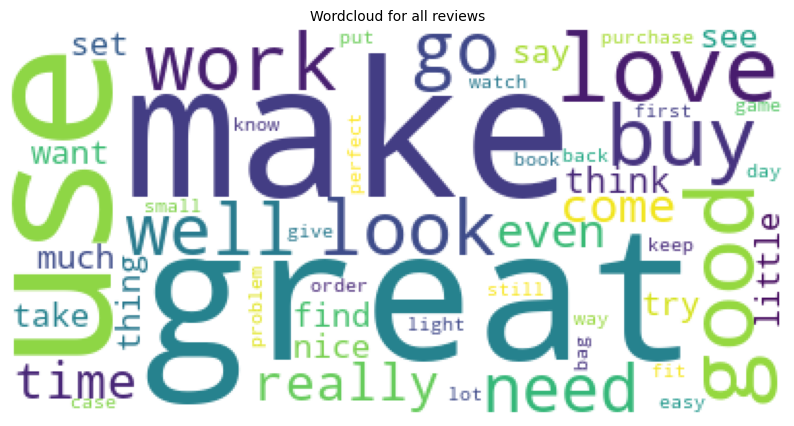

Top 10 most frequent words:
get: 7153
great: 6701
good: 6472
like: 6237
work: 5435
make: 4970
buy: 4886
well: 4840
look: 4821
love: 4732


In [36]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = " ".join(df['CLEANED_TEXT'])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

word_counts = Counter(reviews.split())

top_10_words = word_counts.most_common(10)

print("Top 10 most frequent words:")
for word, count in top_10_words:
    print(f"{word}: {count}")


In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Category_Label'] = label_encoder.fit_transform(df['PRODUCT_CATEGORY'])



In [38]:
y=df['LABEL'].values

In [39]:
bert_df=pd.concat([df['LABEL'],df['PRODUCT_TITLE'],df['REVIEW_TITLE'],df['REVIEW_TEXT'],df['Category_Label'],df['RATING'],df['VERIFIED_PURCHASE']], axis=1)

In [40]:
bert_df.to_csv("bert_text.csv")

In [41]:

combined_df = pd.concat([df['LABEL'],df['Category_Label'],df['CLEANED_PRODUCT_TITLE'],df['CLEANED_TITLE'],df['CLEANED_TEXT'],df['RATING'],df['VERIFIED_PURCHASE'],df['REVIEW_LENGTH'],df['NUM_PUNCTUATIONS'],df['CAPS_COUNT'],df['stopwords_count'],df['characters_count'],df['matchesPTITLE']], axis=1)



In [42]:
data=combined_df.dropna()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   LABEL                  21000 non-null  int64 
 1   Category_Label         21000 non-null  int32 
 2   CLEANED_PRODUCT_TITLE  21000 non-null  object
 3   CLEANED_TITLE          21000 non-null  object
 4   CLEANED_TEXT           21000 non-null  object
 5   RATING                 21000 non-null  int64 
 6   VERIFIED_PURCHASE      21000 non-null  int64 
 7   REVIEW_LENGTH          21000 non-null  int64 
 8   NUM_PUNCTUATIONS       21000 non-null  int64 
 9   CAPS_COUNT             21000 non-null  int64 
 10  stopwords_count        21000 non-null  int64 
 11  characters_count       21000 non-null  int64 
 12  matchesPTITLE          21000 non-null  int64 
dtypes: int32(1), int64(9), object(3)
memory usage: 2.0+ MB


In [44]:
data.to_csv("text_preprocessed.csv")

In [45]:
df=pd.read_csv("text_preprocessed.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             21000 non-null  int64 
 1   LABEL                  21000 non-null  int64 
 2   Category_Label         21000 non-null  int64 
 3   CLEANED_PRODUCT_TITLE  20998 non-null  object
 4   CLEANED_TITLE          20926 non-null  object
 5   CLEANED_TEXT           21000 non-null  object
 6   RATING                 21000 non-null  int64 
 7   VERIFIED_PURCHASE      21000 non-null  int64 
 8   REVIEW_LENGTH          21000 non-null  int64 
 9   NUM_PUNCTUATIONS       21000 non-null  int64 
 10  CAPS_COUNT             21000 non-null  int64 
 11  stopwords_count        21000 non-null  int64 
 12  characters_count       21000 non-null  int64 
 13  matchesPTITLE          21000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.2+ MB


In [47]:
df.dropna(inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20924 entries, 0 to 20999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             20924 non-null  int64 
 1   LABEL                  20924 non-null  int64 
 2   Category_Label         20924 non-null  int64 
 3   CLEANED_PRODUCT_TITLE  20924 non-null  object
 4   CLEANED_TITLE          20924 non-null  object
 5   CLEANED_TEXT           20924 non-null  object
 6   RATING                 20924 non-null  int64 
 7   VERIFIED_PURCHASE      20924 non-null  int64 
 8   REVIEW_LENGTH          20924 non-null  int64 
 9   NUM_PUNCTUATIONS       20924 non-null  int64 
 10  CAPS_COUNT             20924 non-null  int64 
 11  stopwords_count        20924 non-null  int64 
 12  characters_count       20924 non-null  int64 
 13  matchesPTITLE          20924 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.4+ MB


In [49]:
df.to_csv("text_preprocessed.csv")